In [ ]:
!pip install NeuralForecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [ ]:
# X_df = pd.read_csv('datasets_reproducibity/Exchange/S/df_x.csv')
# Y_df = pd.read_csv('datasets_reproducibity/Exchange/S/df_y.csv')

X_df = pd.read_csv('/content/df_x.csv')
Y_df = pd.read_csv('/content/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...
7583,2010-10-06,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_df

,ds,unique_id,y
0,1990-01-01,OT,-0.124081
1,1990-01-02,OT,-0.113588
2,1990-01-03,OT,-0.078960
3,1990-01-04,OT,-0.082108
4,1990-01-05,OT,-0.066368
...,...,...,...
7583,2010-10-06,OT,0.902640
7584,2010-10-07,OT,0.953585
7585,2010-10-08,OT,0.956124
7586,2010-10-09,OT,0.921979


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:7492,:]
Y_test_df = Y_df.iloc[7492:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7492,2010-07-07,OT,1.313849,-0.5,-0.166667,-0.300000,0.012329
1,7493,2010-07-08,OT,1.265496,-0.5,0.000000,-0.266667,0.015068
2,7494,2010-07-09,OT,1.271299,-0.5,0.166667,-0.233333,0.017808
3,7495,2010-07-10,OT,1.300722,-0.5,0.333333,-0.200000,0.020548
4,7496,2010-07-11,OT,1.296545,-0.5,0.500000,-0.166667,0.023288
...,...,...,...,...,...,...,...,...
91,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
92,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
93,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
94,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2010-07-07,OT,1.313849,-0.5,-0.166667,-0.300000,0.012329
1,2010-07-08,OT,1.265496,-0.5,0.000000,-0.266667,0.015068
2,2010-07-09,OT,1.271299,-0.5,0.166667,-0.233333,0.017808
3,2010-07-10,OT,1.300722,-0.5,0.333333,-0.200000,0.020548
4,2010-07-11,OT,1.296545,-0.5,0.500000,-0.166667,0.023288
...,...,...,...,...,...,...,...
91,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
92,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
93,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
94,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 96
model = Autoformer(h=horizon,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=1000,
                   )

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 148 K 
7 | decoder       | Decoder       | 141 K 
------------------------------------------------
290 K     Trainable params
0         Non-trainable params
29

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,1.333524
OT,1,1.321826
OT,2,1.321266
OT,3,1.318248
OT,4,1.337168
...,...,...
OT,91,1.357548
OT,92,1.356561
OT,93,1.350593


<Axes: xlabel='ds'>

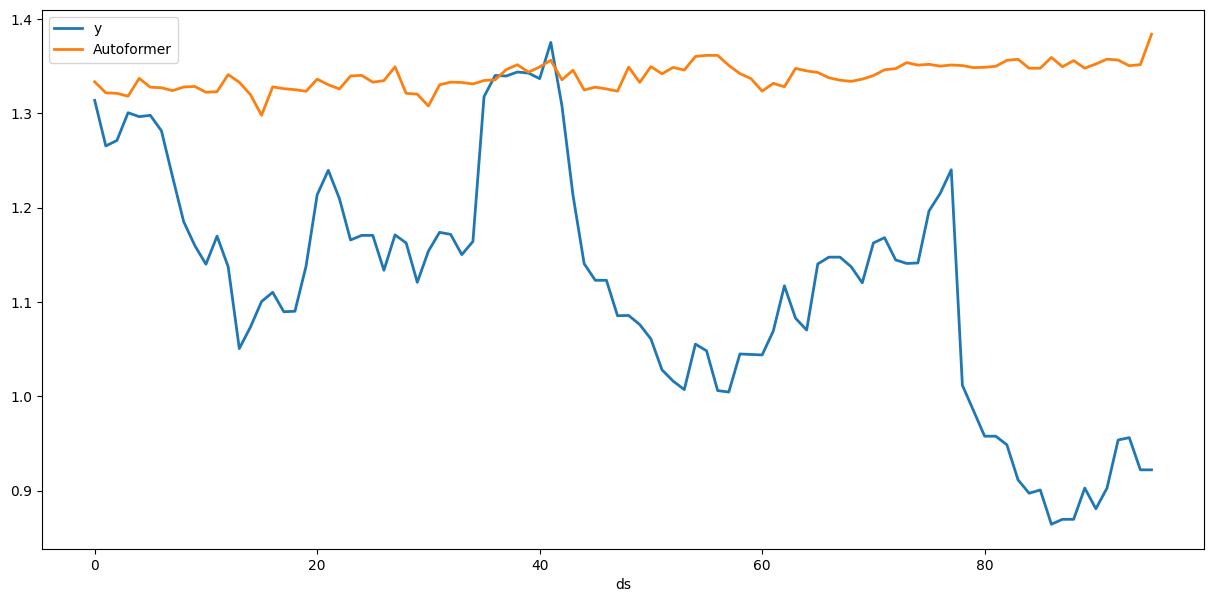

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Autoformer
ds,
0,1.333524
1,1.321826
2,1.321266
3,1.318248
4,1.337168
...,...
91,1.357548
92,1.356561
93,1.350593


In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 0.223
Autoformer MSE: 0.067


## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:7396,:]
Y_test_df = Y_df.iloc[7396:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7396,2010-04-02,OT,1.251718,-0.5,0.166667,-0.466667,-0.250685
1,7397,2010-04-03,OT,1.138444,-0.5,0.333333,-0.433333,-0.247945
2,7398,2010-04-04,OT,1.138444,-0.5,0.500000,-0.400000,-0.245205
3,7399,2010-04-05,OT,1.138444,-0.5,-0.500000,-0.366667,-0.242466
4,7400,2010-04-06,OT,0.992389,-0.5,-0.333333,-0.333333,-0.239726
...,...,...,...,...,...,...,...,...
187,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
188,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
189,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
190,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2010-04-02,OT,1.251718,-0.5,0.166667,-0.466667,-0.250685
1,2010-04-03,OT,1.138444,-0.5,0.333333,-0.433333,-0.247945
2,2010-04-04,OT,1.138444,-0.5,0.500000,-0.400000,-0.245205
3,2010-04-05,OT,1.138444,-0.5,-0.500000,-0.366667,-0.242466
4,2010-04-06,OT,0.992389,-0.5,-0.333333,-0.333333,-0.239726
...,...,...,...,...,...,...,...
187,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
188,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
189,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
190,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 192
model = Autoformer(h=horizon,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=1000,
                   )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 148 K 
7 | decoder       | Decoder       | 141 K 
------------------------------------------------
290 K     Trainable params
0         Non-trainable params
29

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,1.131711
OT,1,1.056121
OT,2,1.093140
OT,3,1.080431
OT,4,1.078199
...,...,...
OT,187,1.137732
OT,188,1.159484
OT,189,1.145961


<Axes: xlabel='ds'>

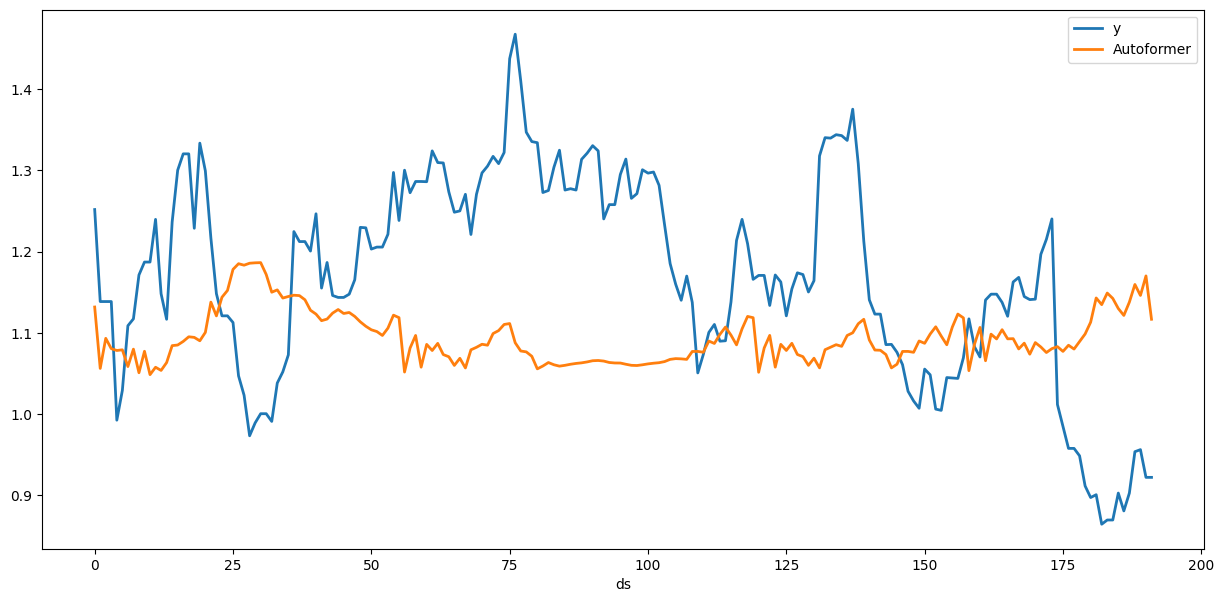

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Autoformer
ds,
0,1.131711
1,1.056121
2,1.093140
3,1.080431
4,1.078199
...,...
187,1.137732
188,1.159484
189,1.145961


In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 0.138
Autoformer MSE: 0.026


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:7252,:]
Y_test_df = Y_df.iloc[7252:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7252,2009-11-09,OT,0.457496,-0.5,-0.500000,-0.233333,0.354795
1,7253,2009-11-10,OT,0.486961,-0.5,-0.333333,-0.200000,0.357534
2,7254,2009-11-11,OT,0.465229,-0.5,-0.166667,-0.166667,0.360274
3,7255,2009-11-12,OT,0.637980,-0.5,0.000000,-0.133333,0.363014
4,7256,2009-11-13,OT,0.716490,-0.5,0.166667,-0.100000,0.365753
...,...,...,...,...,...,...,...,...
331,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
332,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
333,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
334,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2009-11-09,OT,0.457496,-0.5,-0.500000,-0.233333,0.354795
1,2009-11-10,OT,0.486961,-0.5,-0.333333,-0.200000,0.357534
2,2009-11-11,OT,0.465229,-0.5,-0.166667,-0.166667,0.360274
3,2009-11-12,OT,0.637980,-0.5,0.000000,-0.133333,0.363014
4,2009-11-13,OT,0.716490,-0.5,0.166667,-0.100000,0.365753
...,...,...,...,...,...,...,...
331,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
332,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
333,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
334,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 336
model = Autoformer(h=horizon,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=1000,
                   )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 148 K 
7 | decoder       | Decoder       | 141 K 
------------------------------------------------
290 K     Trainable params
0         Non-trainable params
29

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 174.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 53.06 MiB is free. Process 2170 has 14.69 GiB memory in use. Of the allocated memory 14.36 GiB is allocated by PyTorch, and 179.16 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

## Horizon 720

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:6868,:]
Y_test_df = Y_df.iloc[6868:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
horizon = 720
model = Autoformer(h=horizon,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=1000,
                   )

In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')